In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import mutual_info_score, confusion_matrix, classification_report, roc_auc_score

# Data Preparation

In [3]:
df = pd.read_csv('./loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


Checking the type of the records.

In [4]:
df.dtypes

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

The person age is integer number, so we will change the data type into an integer.

In [5]:
df['person_age'] = df['person_age'].astype('int')
df['person_age'].dtypes

dtype('int32')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  int32  
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [7]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


There were not any null columns, nevertheless, the data seems suspicious since we can see that the maximum person age is 144 years of age and person with employee experience as great as 125 years. 

We will take a look through the EDA down below.

In [8]:
# separating categorical and numerical columns
categorical = [feat for feat in df.columns if df[feat].dtypes == 'object']
numerical = [feat for feat in df.drop(columns='loan_status').columns if df[feat].dtypes != 'object']

print(f'Categorical features: {categorical}')
print(f'Numerical features: {numerical}')

Categorical features: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
Numerical features: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']


# Explanatory Data Analysis (EDA)

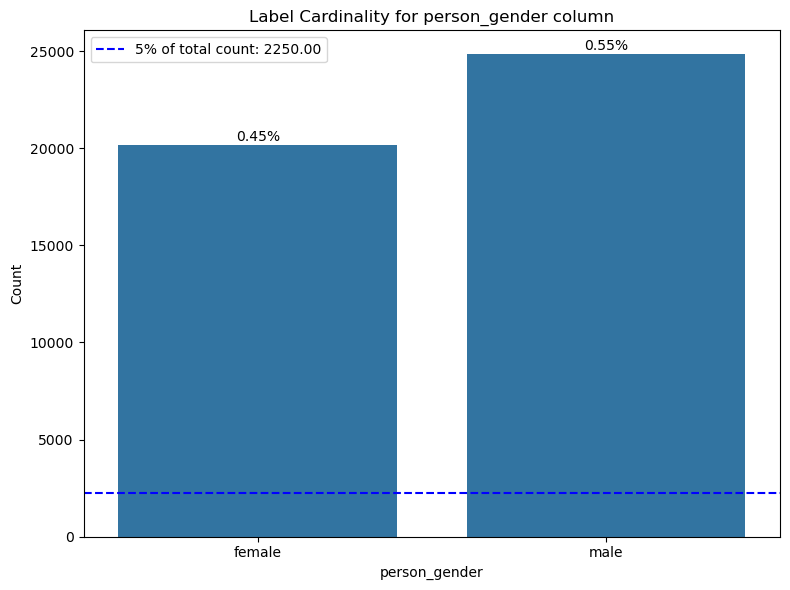

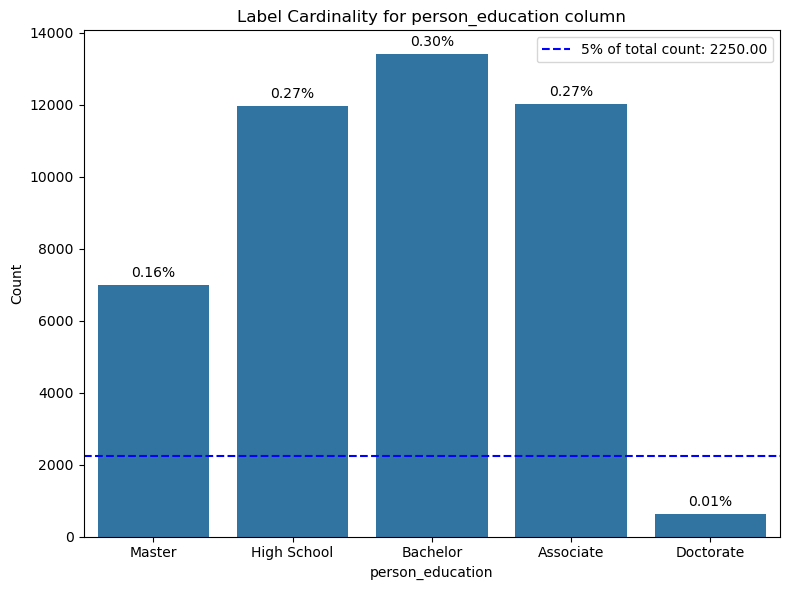

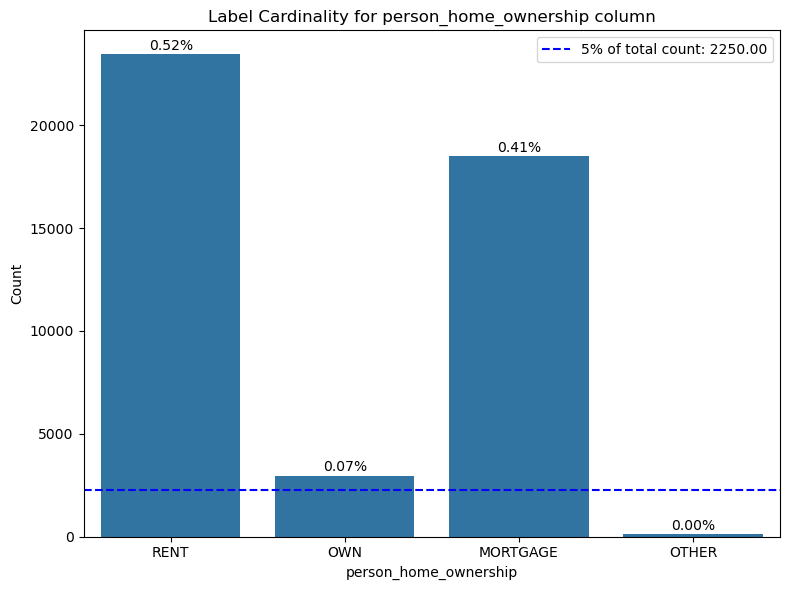

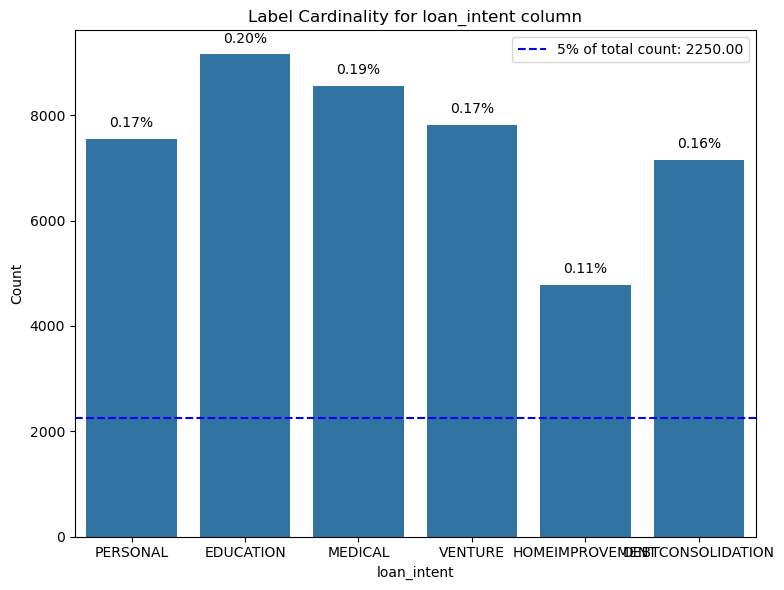

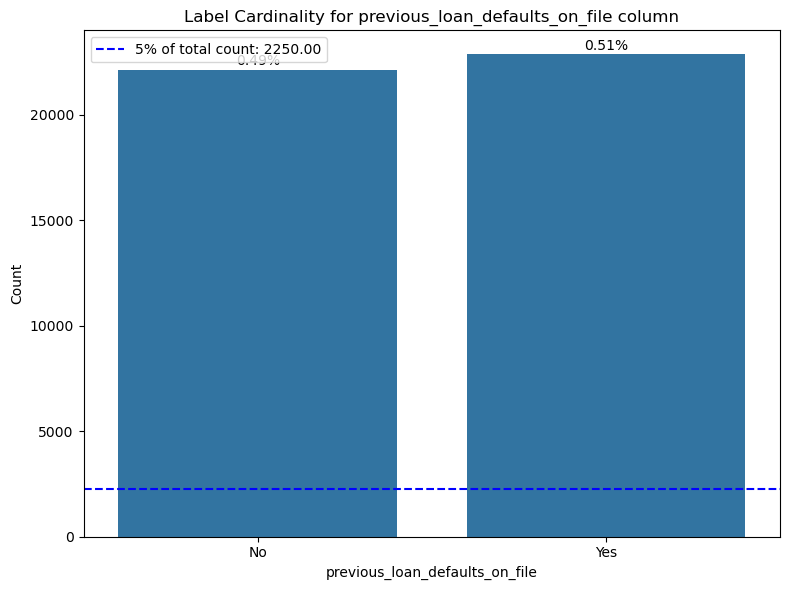

In [9]:
# plotting distribution for categorical variable
for col in categorical:

    plt.figure(figsize=(8,6))
    ax = sns.countplot(x=df[col])
    total_count = len(df[col])
    # finding majority (> 5% of total value)
    threshold = 0.05 * total_count
    count = df[col].value_counts(normalize=True) * 100
    ax.axhline(threshold, color = 'blue', linestyle='--', label=f'5% of total count: {threshold:.2f}')


    # adding label count text
    for p in ax.patches:
        height = p.get_height()
        perc = (height / total_count)
        ax.text(p.get_x() + p.get_width() / 2, height + 0.005 * total_count, f'{perc:.2f}%', ha='center')

    plt.title(f'Label Cardinality for {col} column')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.tight_layout()

    plt.legend()
    plt.show()

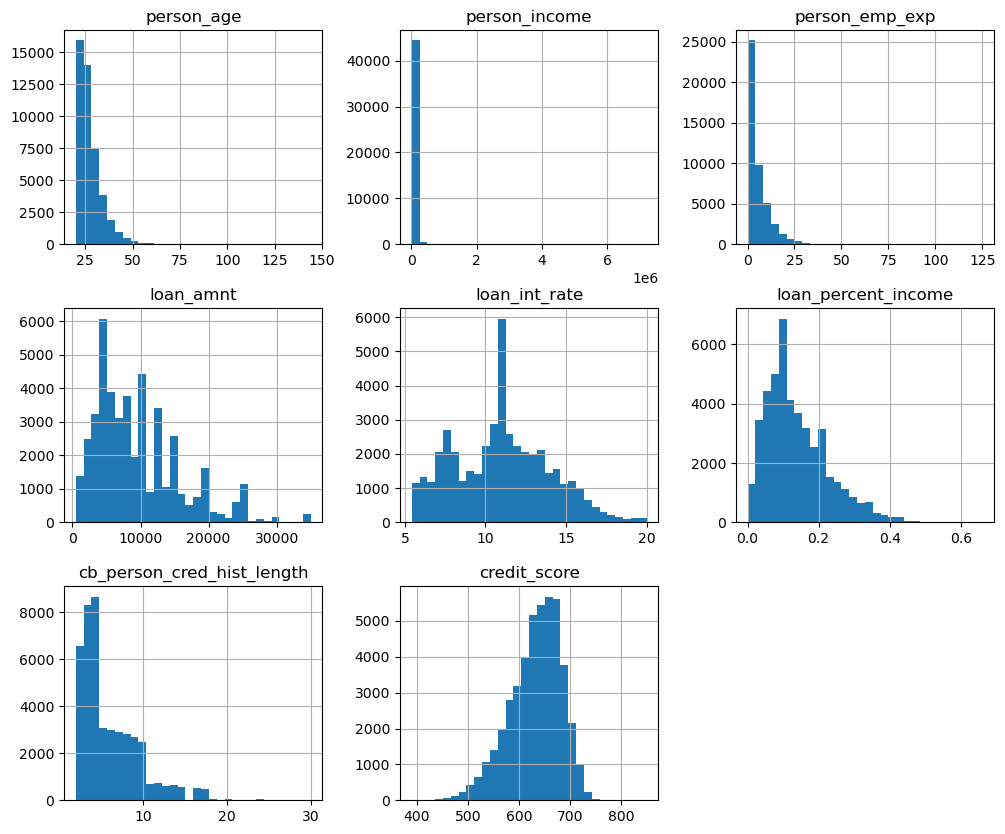

In [10]:
# distribution of numerical features
df[numerical].hist(bins=30, figsize=(12,10))
plt.show()

As mentioned previously there were some invalid information in _person_age_ and _person_emp_exp_ columns. We will check the outlier using the boxplot and remove them. 

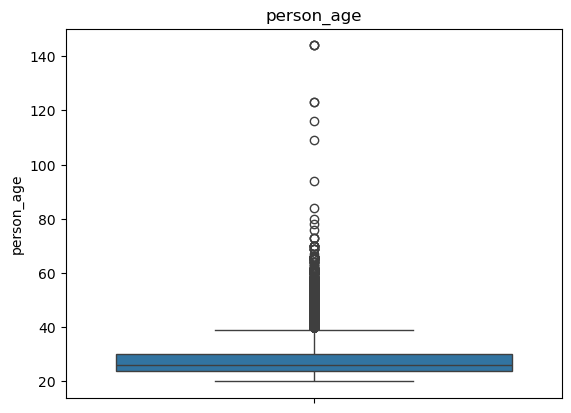

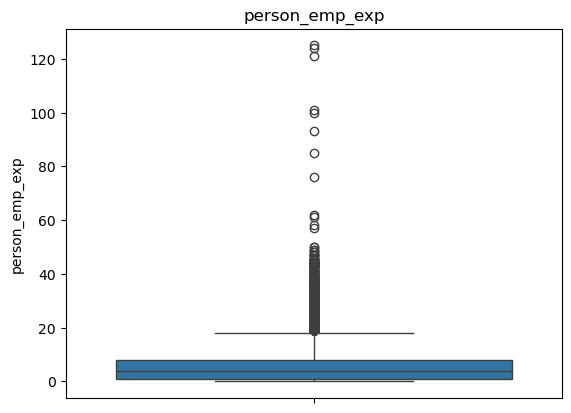

In [11]:
for col in ['person_age', 'person_emp_exp']:
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

Though it is seldom, it is still usual that people can reach around the age of 80 and that can make the employment experience around 60 years possible, therefore we took that numbers as threshold to remove the outliers.

In [12]:
df[df['person_age']>80]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
81,144,male,Bachelor,300616.0,125,RENT,4800.0,VENTURE,13.57,0.02,3.0,789,No,0
183,144,male,Associate,241424.0,121,MORTGAGE,6000.0,EDUCATION,11.86,0.02,2.0,807,No,0
575,123,female,High School,97140.0,101,RENT,20400.0,EDUCATION,10.25,0.21,3.0,805,Yes,0
747,123,male,Bachelor,94723.0,100,RENT,20000.0,VENTURE,11.01,0.21,4.0,714,Yes,0
32297,144,female,Associate,7200766.0,124,MORTGAGE,5000.0,PERSONAL,12.73,0.00,25.0,850,No,0
32416,94,male,High School,29738.0,76,RENT,6500.0,MEDICAL,11.01,0.22,27.0,773,No,0
32506,84,male,High School,114705.0,61,MORTGAGE,10000.0,PERSONAL,7.51,0.09,24.0,784,Yes,0
37930,116,male,Bachelor,5545545.0,93,MORTGAGE,3823.0,VENTURE,12.15,0.00,24.0,708,No,0
38113,109,male,High School,5556399.0,85,MORTGAGE,6195.0,VENTURE,12.58,0.00,22.0,792,No,0


In [13]:
df[df['person_emp_exp'] > 60]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
81,144,male,Bachelor,300616.0,125,RENT,4800.0,VENTURE,13.57,0.02,3.0,789,No,0
183,144,male,Associate,241424.0,121,MORTGAGE,6000.0,EDUCATION,11.86,0.02,2.0,807,No,0
575,123,female,High School,97140.0,101,RENT,20400.0,EDUCATION,10.25,0.21,3.0,805,Yes,0
747,123,male,Bachelor,94723.0,100,RENT,20000.0,VENTURE,11.01,0.21,4.0,714,Yes,0
32297,144,female,Associate,7200766.0,124,MORTGAGE,5000.0,PERSONAL,12.73,0.00,25.0,850,No,0
32416,94,male,High School,29738.0,76,RENT,6500.0,MEDICAL,11.01,0.22,27.0,773,No,0
32422,80,male,High School,77894.0,62,RENT,6800.0,MEDICAL,11.71,0.09,25.0,673,No,0
32506,84,male,High School,114705.0,61,MORTGAGE,10000.0,PERSONAL,7.51,0.09,24.0,784,Yes,0
37930,116,male,Bachelor,5545545.0,93,MORTGAGE,3823.0,VENTURE,12.15,0.00,24.0,708,No,0
38113,109,male,High School,5556399.0,85,MORTGAGE,6195.0,VENTURE,12.58,0.00,22.0,792,No,0


Since the records with that value were not many, it is assumed safe to remove these records from the dataset.

In [14]:
df = df[df['person_age'] <= 80]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44991 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      44991 non-null  int32  
 1   person_gender                   44991 non-null  object 
 2   person_education                44991 non-null  object 
 3   person_income                   44991 non-null  float64
 4   person_emp_exp                  44991 non-null  int64  
 5   person_home_ownership           44991 non-null  object 
 6   loan_amnt                       44991 non-null  float64
 7   loan_intent                     44991 non-null  object 
 8   loan_int_rate                   44991 non-null  float64
 9   loan_percent_income             44991 non-null  float64
 10  cb_person_cred_hist_length      44991 non-null  float64
 11  credit_score                    44991 non-null  int64  
 12  previous_loan_defaults_on_file  44991

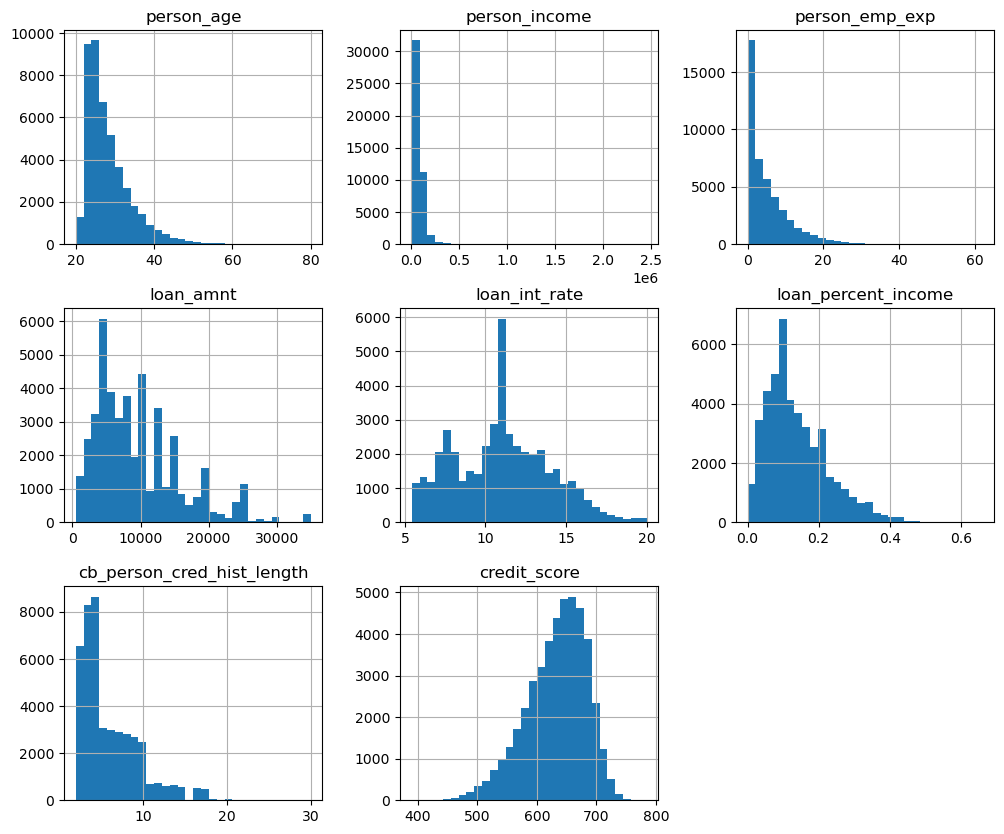

In [16]:
# distribution of numerical features after removing the outlier
df[numerical].hist(bins=30, figsize=(12,10))
plt.show()

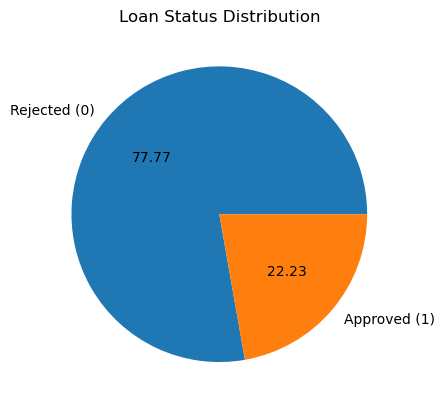

In [17]:
# Distribution of target variable

plt.pie(df['loan_status'].value_counts(), labels=['Rejected (0)', 'Approved (1)'], autopct='%.2f')
plt.title('Loan Status Distribution')
plt.show()

# Set Up Validation Framework and Feature Importance

In [18]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [19]:
print(f'Number of training set: {len(df_train)} ({len(df_train)/len(df)*100:.2f}%)')
print(f'Number of validation set: {len(df_val)} ({len(df_val)/len(df)*100:.2f}%)')
print(f'Number of testing set: {len(df_test)} ({len(df_test)/len(df)*100:.2f}%)')

Number of training set: 26994 (60.00%)
Number of validation set: 8998 (20.00%)
Number of testing set: 8999 (20.00%)


In [20]:
y_train = df_train['loan_status'].values
y_val = df_val['loan_status'].values
y_test = df_test['loan_status'].values

In [21]:
# Analyze categorical feature importance using mutual info score
def mutual_information(series):
    return mutual_info_score(series, df_full_train['loan_status'])

In [22]:
df_full_train[categorical].apply(mutual_information).round(2).sort_values(ascending=False)

previous_loan_defaults_on_file    0.19
person_home_ownership             0.03
loan_intent                       0.01
person_gender                     0.00
person_education                  0.00
dtype: float64

It showed that previous loan default has strong influence in the loan status approval. 

In [23]:
# For the numerical features we used correlation to check its importance
df_full_train[numerical].corrwith(df_full_train['loan_status']).round(3).sort_values(ascending=False)

loan_percent_income           0.386
loan_int_rate                 0.332
loan_amnt                     0.107
credit_score                 -0.009
cb_person_cred_hist_length   -0.018
person_emp_exp               -0.023
person_age                   -0.025
person_income                -0.167
dtype: float64

Loan to income ratio has a strong positive correlation with the loan status while the person's income itself has strong negative correlation. 

# Model Training & Parameter Tuning

In [24]:
def train_logit(df_train, y_train, C=1.0):

    # one hot encoding
    dicts = df_train[categorical + numerical].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    # model training
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

In [25]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [26]:
dv, model = train_logit(df_train, y_train)

In [27]:
y_pred = predict(df_val, dv, model)

In [28]:
prediction = (y_pred >= 0.5)

In [29]:
confusion_matrix(y_val, prediction)

array([[6941,  101],
       [1676,  280]], dtype=int64)

In [30]:
print(classification_report(y_val, prediction))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      7042
           1       0.73      0.14      0.24      1956

    accuracy                           0.80      8998
   macro avg       0.77      0.56      0.56      8998
weighted avg       0.79      0.80      0.75      8998



In [31]:
def train_tree(df_train, y_train):
    # one hot encoding
    dicts = df_train[categorical + numerical].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    # model training
    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    return dv, model

In [32]:
dv, model = train_tree(df_train, y_train)

In [33]:
y_pred_tree = predict(df_val, dv, model)

In [34]:
tree_prediction = (y_pred_tree >= 0.5)

In [35]:
confusion_matrix(y_val, tree_prediction)

array([[6847,  195],
       [ 455, 1501]], dtype=int64)

In [36]:
print(classification_report(y_val, tree_prediction))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7042
           1       0.89      0.77      0.82      1956

    accuracy                           0.93      8998
   macro avg       0.91      0.87      0.89      8998
weighted avg       0.93      0.93      0.93      8998



Comparing several metrics (precision, recall, f1-score, accuracy) random forest classifier is better than logistic regression. We will do fine tuning for random forest model.

In [37]:
scores = []

for n in range(10, 201, 10):

    train_dicts = df_train[categorical + numerical].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dicts)

    # model training
    model = RandomForestClassifier(n_estimators=n)
    model.fit(X_train, y_train)

    # model prediction
    val_dicts = df_val[categorical + numerical].to_dict(orient='records')

    X_val = dv.transform(val_dicts)
    y_pred = model.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((n, auc))

In [38]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

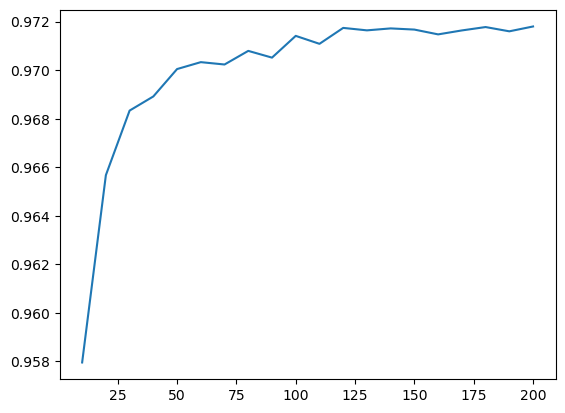

In [39]:
plt.plot(df_scores.n_estimators, df_scores.auc)
plt.show()

n_estimators = 50 already shows the model AUC stability. Therefore it will be used to train the final model.

# Training & Saving Final Model

In [40]:
train_dicts = df_full_train[categorical + numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(train_dicts)

# model training
model = RandomForestClassifier(n_estimators=50)
model.fit(X_full_train, df_full_train['loan_status'].values)

# model prediction
test_dicts = df_test[categorical + numerical].to_dict(orient='records')

X_test = dv.transform(test_dicts)
y_pred = model.predict_proba(X_test)[:, 1]
test_prediction = (y_pred >= 0.5)

In [41]:
confusion_matrix(y_test, test_prediction)

array([[6786,  201],
       [ 471, 1541]], dtype=int64)

In [42]:
print(classification_report(y_test, test_prediction))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      6987
           1       0.88      0.77      0.82      2012

    accuracy                           0.93      8999
   macro avg       0.91      0.87      0.89      8999
weighted avg       0.92      0.93      0.92      8999



In [43]:
output_file = f'model_n=50.bin'

In [44]:
with open(output_file, 'wb') as f_out:
    pickle.dump((dv, model), f_out)